In [1]:
import numpy as np
import pandas as pd
from os.path import exists

import seaborn as sns
import helper_visualize as help_vis
import helper_data_load as help_load
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
import os

# Functions

In [2]:
def get_compl_file(base_path, file_begin_str):
    for i in os.listdir(base_path):
            if os.path.isfile(os.path.join(base_path,i)) and file_begin_str in i:
                filename = i
    return base_path + filename

def get_heatmap(met_df, title):
    ax = sns.heatmap(met_df, annot=True, fmt=".3", cmap= sns.color_palette("Blues", as_cmap=True))# , cmap="YlGnBu"
    ax.set(xlabel="", ylabel="")
    ax.xaxis.tick_top()
    ax.set_title(title)
    #plt.show()
    plt.tight_layout()
    plt.savefig("../../Plots/Heatmaps/Genomics/"+title+".png", dpi=150)
    plt.show()

def get_corr_meth(feat_sel_temp):
    if feat_sel_temp == "pearson": corr_meth = -2
    elif feat_sel_temp == "mrmr": corr_meth = 5
    else: corr_meth = -1
    return corr_meth

def rename_heat_map(df):
    ml_names = ["Bagging R.", "ElasticNet", "Ensemble LR", "Gradient Boosting R.", "Lasso R.", "Linear R.", "Random Forest R.", "SVR"]
    dict_ml_names = dict(zip(list(df.index), ml_names))
    print(dict_ml_names)
    
    fs_names = ["MRMR 5","Spearman", "Pearson", "F-Reg.", "MIM"] # "RF-VI", "F-Reg"
    dict_fs_names = dict(zip(list(df.columns), fs_names))

    print(dict_fs_names)
    df = df.rename(columns=dict_fs_names)
    df = df.rename(index=dict_ml_names)
    return df
def pred_to_short(predictor):
     dict_to_short= {"os_days": "os", "pdl1_tps": "pdl1", "pfs_days": "pfs"}
     return dict_to_short[predictor]

def get_folder_name(predictor, num_genes):
    BASE = "../../Data/Results/"
    pred_short = pred_to_short(predictor)
    folder_name = pred_short + "_" + str(num_genes) + "gen"
    disc = "/results/preds/"
    vali = "/eval/preds/"
    import_path_disc = BASE + folder_name + disc
    import_path_vali = BASE + folder_name + vali
    return import_path_disc, import_path_vali

In [6]:
def get_disc_metric(predictor, num_genes, df_col_idx_names):
    metric="c"
    metric_df = pd.DataFrame(index=df_col_idx_names[0], columns=df_col_idx_names[1])
    nr_feats_df = pd.DataFrame(index=df_col_idx_names[0], columns=df_col_idx_names[1])
    for model_temp in df_col_idx_names[0]:
        for feat_sel_temp in df_col_idx_names[1]:
            corr_meth = get_corr_meth(feat_sel_temp)

            file_begin = predictor + "_cv_preds_" + str(model_temp) + "_" + feat_sel_temp + str(corr_meth)

            import_path_disc, _ = get_folder_name(predictor, num_genes)
            file_path = get_compl_file(import_path_disc, file_begin)
            string_parts = file_path.split("_")
            nr_feats = string_parts[-1].split(".")[0]
            nr_feats_df.loc[model_temp, feat_sel_temp] = int(nr_feats) + 1

            metric_df = help_vis.eval_disc(file_path, model_temp, feat_sel_temp, metric_df, metric)
    display(nr_feats_df)
    metric_df = rename_heat_map(metric_df)
    title = predictor + " Disc CHUM " + str(num_genes) + " Genes - Error "+str(metric)
    get_heatmap(metric_df, title)
    return metric_df, nr_feats_df


In [7]:
# Vali
def get_vali_df(predictor, num_genes, df_col_idx_names):
    metric="c"
    _, data_norm = help_load.get_norm_data(local=True, predictor=predictor, genomics=True, num_genomics=num_genes)
    y_vali = data_norm[predictor]
    vali_metric_df = pd.DataFrame(index=df_col_idx_names[0], columns=df_col_idx_names[1])
    for model_temp in df_col_idx_names[0]:
        for feat_sel_temp in df_col_idx_names[1]:
            corr_meth = get_corr_meth(feat_sel_temp)
            file_begin_vali = predictor + "_preds_" + feat_sel_temp + str(corr_meth)
            _, import_path_vali = get_folder_name(predictor, num_genes)
            file_path = get_compl_file(import_path_vali, file_begin_vali)

            vali_metric_df = help_vis.eval_vali(file_path, model_temp, feat_sel_temp, corr_meth, vali_metric_df, metric, y_vali, vali_set)

    vali_metric_df = rename_heat_map(vali_metric_df)
    title = predictor + " Vali IUCPQ " + str(num_genes) + " Genes - Error "+str(metric)
    get_heatmap(vali_metric_df, title)
    return vali_metric_df




# 1000 Genes

os_days


,mrmr,spearman,pearson,f_reg,mim
BaggingRegressor(random_state=42),4,3,15,30,90
ElasticNetCV(random_state=42),3,3,5,4,29
ensemble_LinearRegression(),4,4,33,4,53
GradientBoostingRegressor(random_state=42),2,4,24,39,41
LassoCV(random_state=42),3,4,5,4,7
LinearRegression(),9,3,5,4,31
RandomForestRegressor(random_state=42),4,4,58,13,64
SVR(),4,4,64,63,37


{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


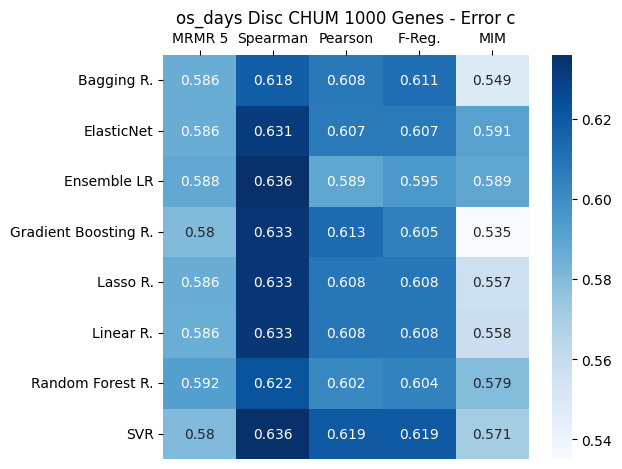

72 patients with clinical and genomics (1000) data for CHUM.
72 patients with clinical and genomics (5000) data for CHUM.
72 patients with clinical and genomics (Immune) data for CHUM.
59 patients with clinical and genomics data for IUCPQ.
72 patients after drop NaN - CHUM.
59 patients after drop NaN - IUCPQ.
{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


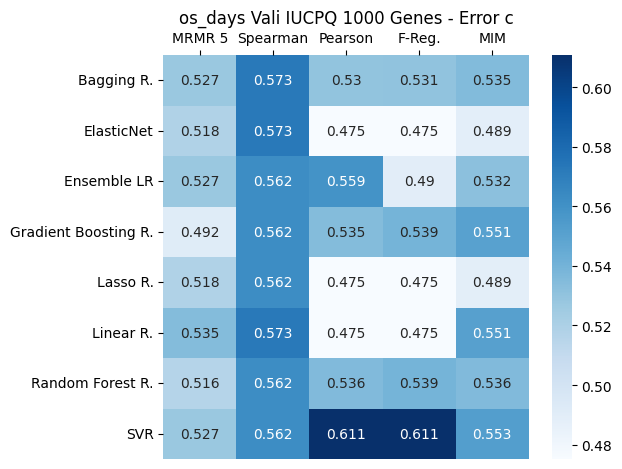

pdl1_tps


,mrmr,spearman,pearson,f_reg,mim
BaggingRegressor(random_state=42),8,100,41,23,30
ElasticNetCV(random_state=42),8,100,29,28,35
ensemble_LinearRegression(),11,99,45,43,87
GradientBoostingRegressor(random_state=42),8,86,88,28,90
LassoCV(random_state=42),8,100,29,28,76
LinearRegression(),8,60,29,28,34
RandomForestRegressor(random_state=42),8,86,27,23,20
SVR(),10,84,33,32,30


{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


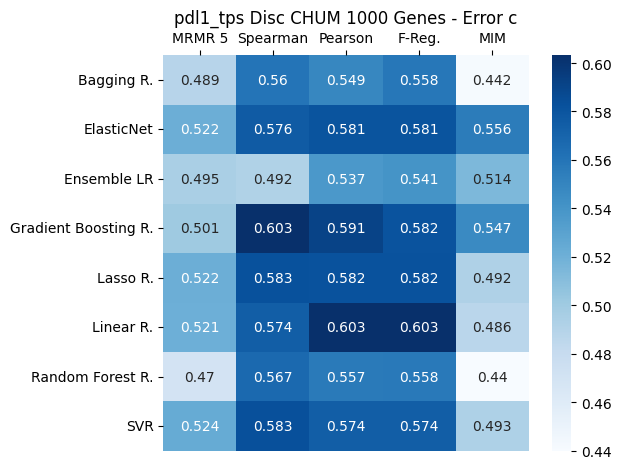

72 patients with clinical and genomics (1000) data for CHUM.
72 patients with clinical and genomics (5000) data for CHUM.
72 patients with clinical and genomics (Immune) data for CHUM.
59 patients with clinical and genomics data for IUCPQ.
71 patients after drop NaN - CHUM.
54 patients after drop NaN - IUCPQ.
{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


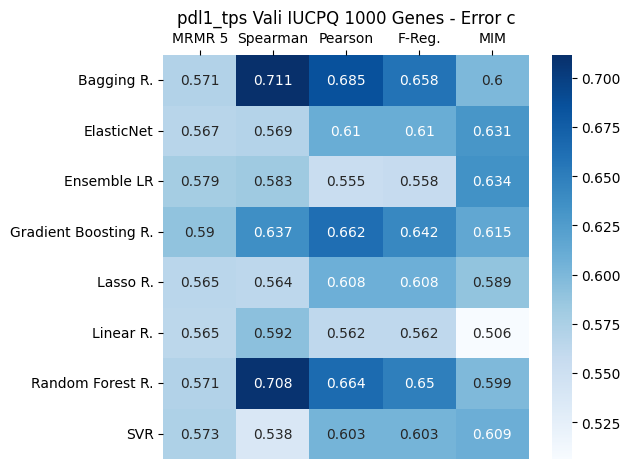

pfs_days


,mrmr,spearman,pearson,f_reg,mim
BaggingRegressor(random_state=42),2,101,4,3,64
ElasticNetCV(random_state=42),2,12,3,2,87
ensemble_LinearRegression(),2,21,7,7,43
GradientBoostingRegressor(random_state=42),2,82,4,3,34
LassoCV(random_state=42),2,12,3,2,99
LinearRegression(),2,12,3,2,22
RandomForestRegressor(random_state=42),4,9,4,3,31
SVR(),2,12,4,3,29


{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


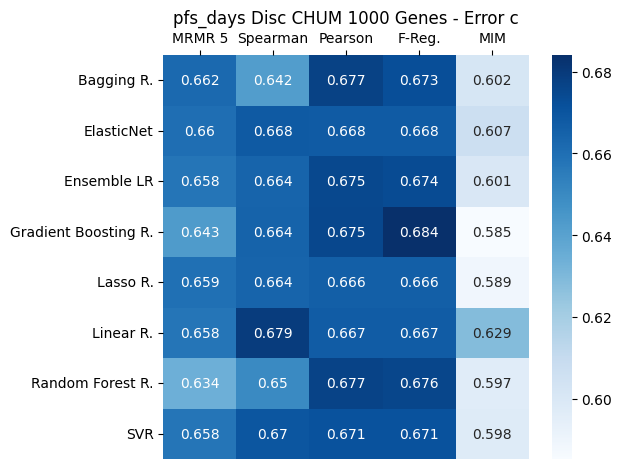

72 patients with clinical and genomics (1000) data for CHUM.
72 patients with clinical and genomics (5000) data for CHUM.
72 patients with clinical and genomics (Immune) data for CHUM.
59 patients with clinical and genomics data for IUCPQ.
72 patients after drop NaN - CHUM.
59 patients after drop NaN - IUCPQ.
{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


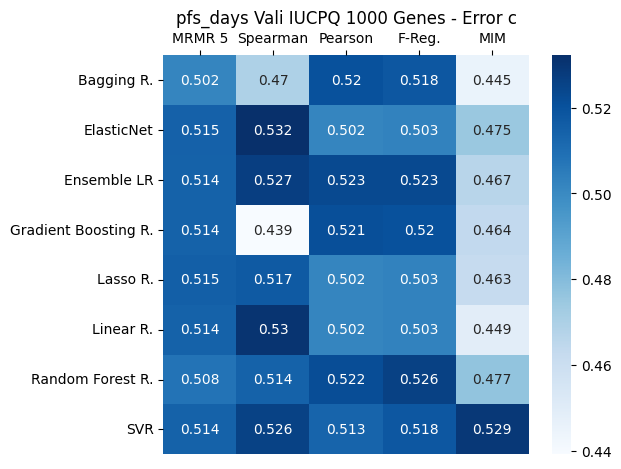

In [8]:
model_list = ["BaggingRegressor(random_state=42)", "ElasticNetCV(random_state=42)", "ensemble_LinearRegression()", "GradientBoostingRegressor(random_state=42)","LassoCV(random_state=42)", "LinearRegression()", "RandomForestRegressor(random_state=42)", "SVR()"]
feat_sel_meth_list = [ "mrmr", "spearman", "pearson", "f_reg", "mim"]
num_genes = 1000
vali_set = "IUCPQ"
disc_set = "CHUM"
predictors = ["os_days", "pdl1_tps", "pfs_days"]
for pred in predictors:
    print(pred)
    for gen_num in [num_genes]:
        metric_df, nr_feats_df_1000gen = get_disc_metric(pred, gen_num, (model_list, feat_sel_meth_list))
        get_vali_df(pred, gen_num, (model_list, feat_sel_meth_list))

# 5000 Genes

os_days


,mrmr,spearman,pearson,f_reg
BaggingRegressor(random_state=42),9,10,23,96
ElasticNetCV(random_state=42),11,8,28,27
ensemble_LinearRegression(),11,9,58,17
GradientBoostingRegressor(random_state=42),10,13,42,63
LassoCV(random_state=42),8,8,40,39
LinearRegression(),11,9,12,11
RandomForestRegressor(random_state=42),4,7,49,35
SVR(),10,3,55,54


{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.'}


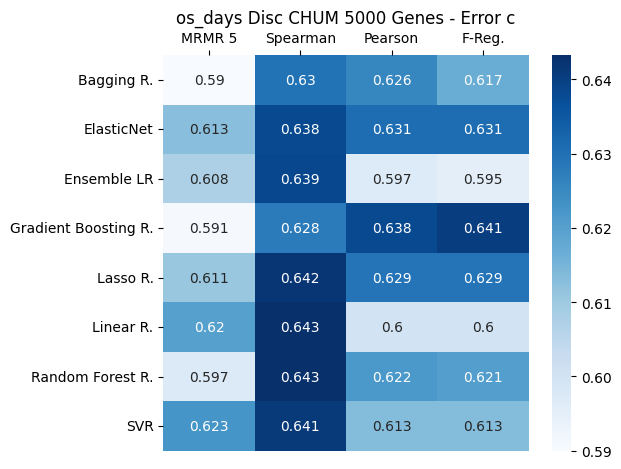

72 patients with clinical and genomics (1000) data for CHUM.
72 patients with clinical and genomics (5000) data for CHUM.
72 patients with clinical and genomics (Immune) data for CHUM.
59 patients with clinical and genomics data for IUCPQ.
72 patients after drop NaN - CHUM.
59 patients after drop NaN - IUCPQ.
{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.'}


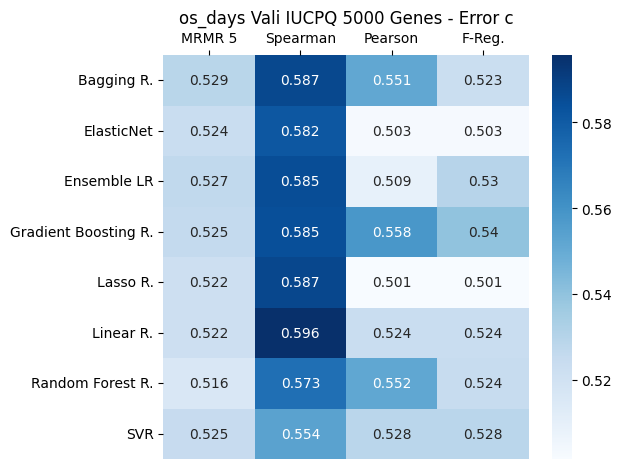

pdl1_tps


,mrmr,spearman,pearson,f_reg
BaggingRegressor(random_state=42),8,3,8,7
ElasticNetCV(random_state=42),9,3,13,12
ensemble_LinearRegression(),11,3,17,2
GradientBoostingRegressor(random_state=42),11,3,7,7
LassoCV(random_state=42),10,3,13,12
LinearRegression(),10,3,79,78
RandomForestRegressor(random_state=42),10,3,8,7
SVR(),4,3,8,7


{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.'}


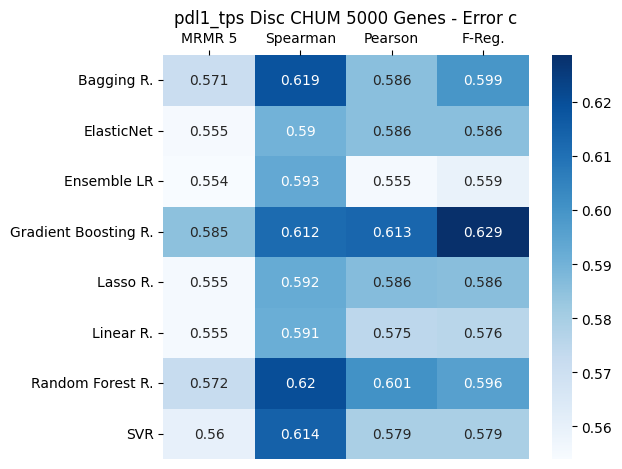

72 patients with clinical and genomics (1000) data for CHUM.
72 patients with clinical and genomics (5000) data for CHUM.
72 patients with clinical and genomics (Immune) data for CHUM.
59 patients with clinical and genomics data for IUCPQ.
71 patients after drop NaN - CHUM.
54 patients after drop NaN - IUCPQ.
{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.'}


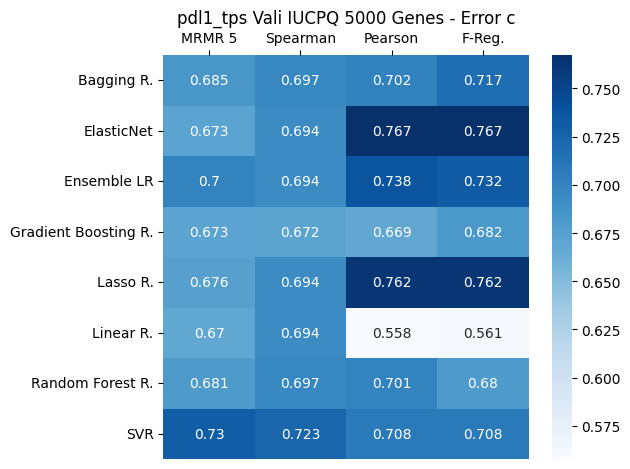

pfs_days


,mrmr,spearman,pearson,f_reg
BaggingRegressor(random_state=42),4,99,90,99
ElasticNetCV(random_state=42),3,46,79,78
ensemble_LinearRegression(),3,55,44,4
GradientBoostingRegressor(random_state=42),4,43,83,80
LassoCV(random_state=42),3,59,93,92
LinearRegression(),3,51,23,22
RandomForestRegressor(random_state=42),3,99,88,76
SVR(),3,70,82,81


{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.'}


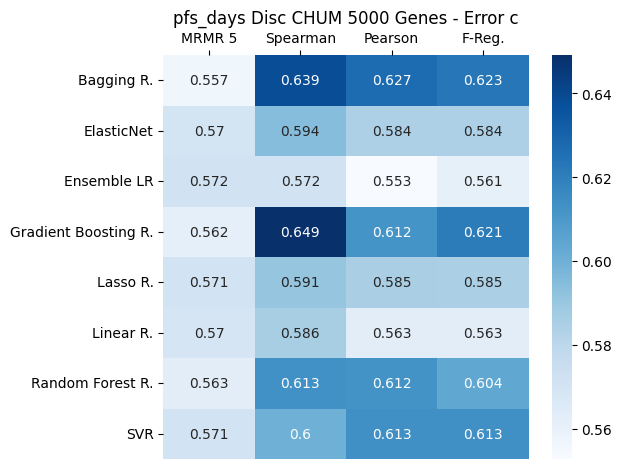

72 patients with clinical and genomics (1000) data for CHUM.
72 patients with clinical and genomics (5000) data for CHUM.
72 patients with clinical and genomics (Immune) data for CHUM.
59 patients with clinical and genomics data for IUCPQ.
72 patients after drop NaN - CHUM.
59 patients after drop NaN - IUCPQ.
{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.'}


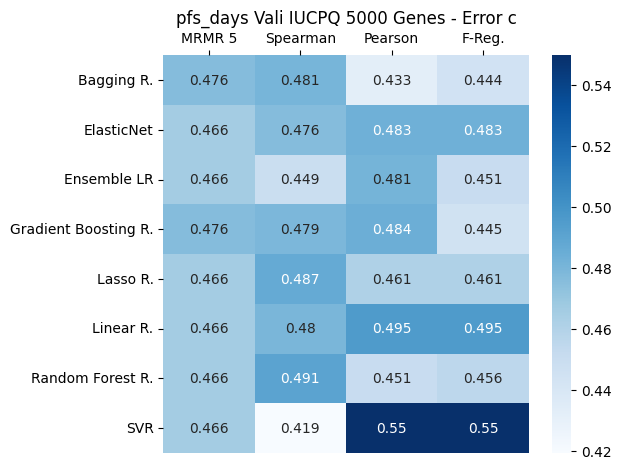

In [9]:
model_list = ["BaggingRegressor(random_state=42)", "ElasticNetCV(random_state=42)", "ensemble_LinearRegression()", "GradientBoostingRegressor(random_state=42)","LassoCV(random_state=42)", "LinearRegression()", "RandomForestRegressor(random_state=42)", "SVR()"]
feat_sel_meth_list = [ "mrmr", "spearman", "pearson", "f_reg"]
num_genes = 5000
vali_set = "IUCPQ"
disc_set = "CHUM"
predictors = ["os_days", "pdl1_tps", "pfs_days"]
for pred in predictors:
    print(pred)
    for gen_num in [num_genes]:
        vali_metric_df, nr_feats_df_5000gen = get_disc_metric(pred, gen_num, (model_list, feat_sel_meth_list))
        get_vali_df(pred, gen_num, (model_list, feat_sel_meth_list))

In [25]:
nr_feats_df_1000gen

,mrmr,spearman,pearson,f_reg,mim
BaggingRegressor(random_state=42),1,100,3,2,63
ElasticNetCV(random_state=42),1,11,2,1,86
ensemble_LinearRegression(),1,20,6,6,42
GradientBoostingRegressor(random_state=42),1,81,3,2,33
LassoCV(random_state=42),1,11,2,1,98
LinearRegression(),1,11,2,1,21
RandomForestRegressor(random_state=42),3,8,3,2,30
SVR(),1,11,3,2,28


In [26]:
nr_feats_df_5000gen

,mrmr,spearman,pearson,f_reg
BaggingRegressor(random_state=42),3,98,89,98
ElasticNetCV(random_state=42),2,45,78,77
ensemble_LinearRegression(),2,54,43,3
GradientBoostingRegressor(random_state=42),3,42,82,79
LassoCV(random_state=42),2,58,92,91
LinearRegression(),2,50,22,21
RandomForestRegressor(random_state=42),2,98,87,75
SVR(),2,69,81,80


# Immune Genes

os_days


,mrmr,spearman,pearson,f_reg,mim
BaggingRegressor(random_state=42),3,24,20,42,35
ElasticNetCV(random_state=42),3,7,20,19,4
ensemble_LinearRegression(),3,10,27,26,6
GradientBoostingRegressor(random_state=42),2,15,18,14,29
LassoCV(random_state=42),3,7,16,15,7
LinearRegression(),3,7,18,17,4
RandomForestRegressor(random_state=42),3,7,19,18,41
SVR(),2,22,16,15,4


{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


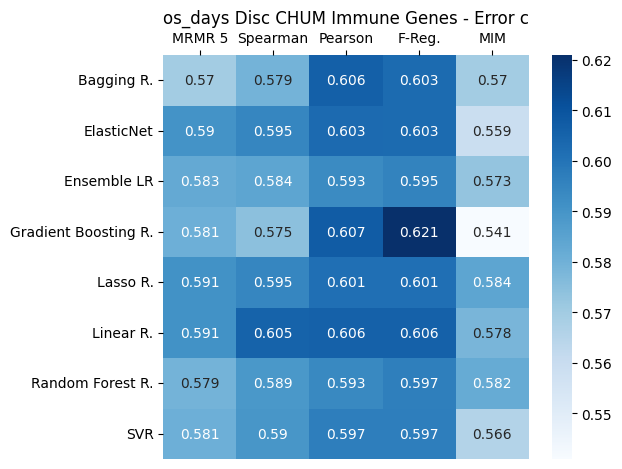

72 patients with clinical and genomics (1000) data for CHUM.
72 patients with clinical and genomics (5000) data for CHUM.
72 patients with clinical and genomics (Immune) data for CHUM.
59 patients with clinical and genomics data for IUCPQ.
72 patients after drop NaN - CHUM.
59 patients after drop NaN - IUCPQ.
{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


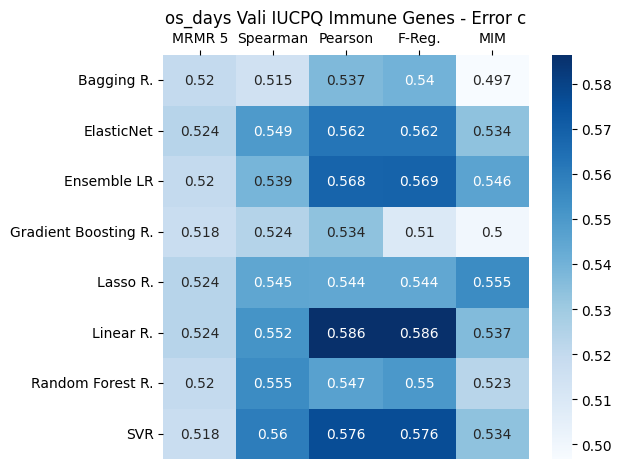

pdl1_tps


,mrmr,spearman,pearson,f_reg,mim
BaggingRegressor(random_state=42),6,5,2,3,50
ElasticNetCV(random_state=42),5,5,2,3,5
ensemble_LinearRegression(),9,9,2,3,48
GradientBoostingRegressor(random_state=42),4,4,2,2,43
LassoCV(random_state=42),5,5,2,3,29
LinearRegression(),5,5,2,3,41
RandomForestRegressor(random_state=42),5,5,5,4,41
SVR(),5,6,2,3,47


{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


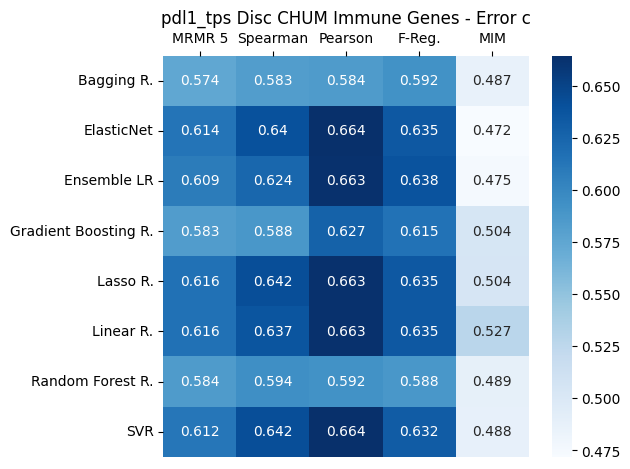

72 patients with clinical and genomics (1000) data for CHUM.
72 patients with clinical and genomics (5000) data for CHUM.
72 patients with clinical and genomics (Immune) data for CHUM.
59 patients with clinical and genomics data for IUCPQ.
71 patients after drop NaN - CHUM.
54 patients after drop NaN - IUCPQ.
{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


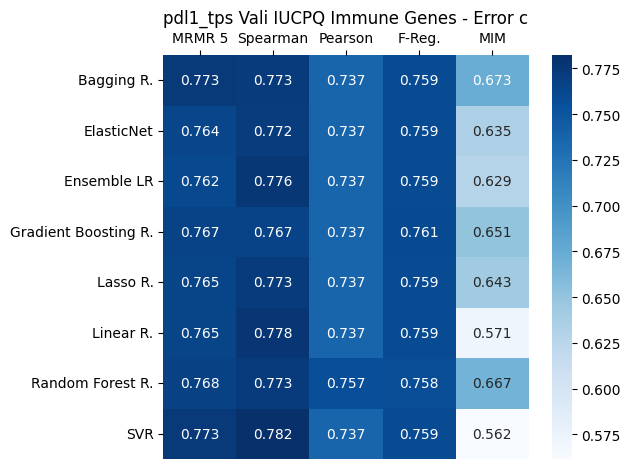

pfs_days


,mrmr,spearman,pearson,f_reg,mim
BaggingRegressor(random_state=42),9,11,37,33,51
ElasticNetCV(random_state=42),7,6,44,43,47
ensemble_LinearRegression(),9,6,2,6,15
GradientBoostingRegressor(random_state=42),7,39,32,46,16
LassoCV(random_state=42),6,3,2,43,49
LinearRegression(),7,11,2,3,51
RandomForestRegressor(random_state=42),10,10,32,45,18
SVR(),7,6,21,20,19


{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


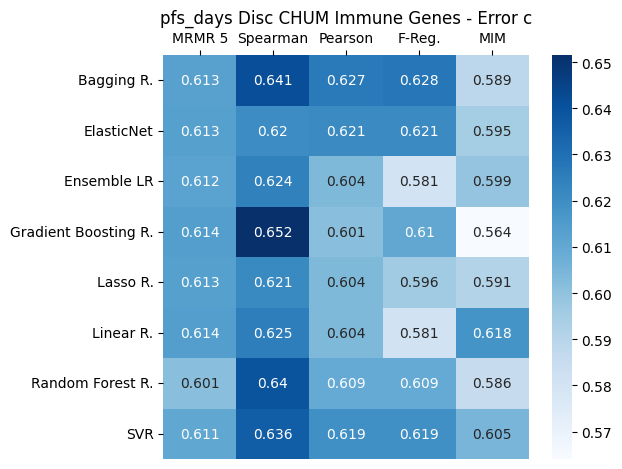

72 patients with clinical and genomics (1000) data for CHUM.
72 patients with clinical and genomics (5000) data for CHUM.
72 patients with clinical and genomics (Immune) data for CHUM.
59 patients with clinical and genomics data for IUCPQ.
72 patients after drop NaN - CHUM.
59 patients after drop NaN - IUCPQ.
{'BaggingRegressor(random_state=42)': 'Bagging R.', 'ElasticNetCV(random_state=42)': 'ElasticNet', 'ensemble_LinearRegression()': 'Ensemble LR', 'GradientBoostingRegressor(random_state=42)': 'Gradient Boosting R.', 'LassoCV(random_state=42)': 'Lasso R.', 'LinearRegression()': 'Linear R.', 'RandomForestRegressor(random_state=42)': 'Random Forest R.', 'SVR()': 'SVR'}
{'mrmr': 'MRMR 5', 'spearman': 'Spearman', 'pearson': 'Pearson', 'f_reg': 'F-Reg.', 'mim': 'MIM'}


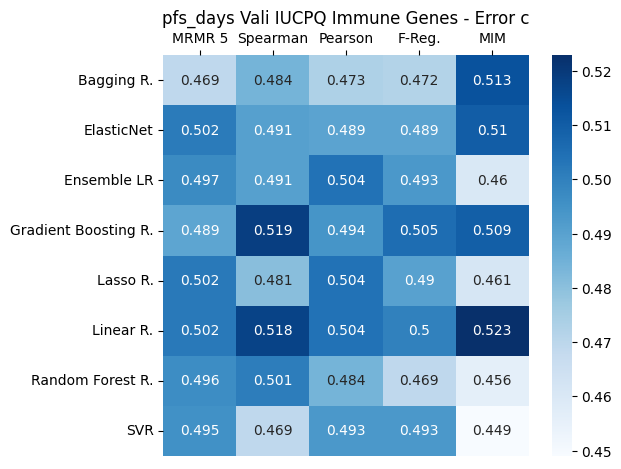

In [10]:
model_list = ["BaggingRegressor(random_state=42)", "ElasticNetCV(random_state=42)", "ensemble_LinearRegression()", "GradientBoostingRegressor(random_state=42)","LassoCV(random_state=42)", "LinearRegression()", "RandomForestRegressor(random_state=42)", "SVR()"]
feat_sel_meth_list = [ "mrmr", "spearman", "pearson", "f_reg", "mim"]
num_genes = "Immune"
vali_set = "IUCPQ"
disc_set = "CHUM"
predictors = ["os_days", "pdl1_tps", "pfs_days"]
for pred in predictors:
    print(pred)
    for gen_num in [num_genes]:
        vali_metric_df, nr_feats_df_Immunegen = get_disc_metric(pred, gen_num, (model_list, feat_sel_meth_list))
        get_vali_df(pred, gen_num, (model_list, feat_sel_meth_list))